# 1- Importing the Dependencies

In [41]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score , classification_report

import matplotlib.pyplot as plt

# Importing seaborn for data visualization
import seaborn as sns

# Alternatively, use scikit-learn's ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# 2- Data Collection & Pre-Processing

In [2]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('mail_data.csv')
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
raw_mail_data.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
raw_mail_data.duplicated().sum()

415

In [5]:
raw_mail_data.drop_duplicates(inplace=True)

In [6]:
raw_mail_data.duplicated().sum()

0

In [7]:
raw_mail_data.shape

(5157, 2)

In [8]:
# replace the null values with a null string

# mail_data = raw_mail_data.where( (pd.notnull(raw_mail_data) ) , '')

raw_mail_data.fillna('',inplace=True)

In [9]:
# printing the first 5 rows of the dataframe
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking the number of rows and columns in the dataframe
raw_mail_data.shape

(5157, 2)

# 3- Label Encoding

    spam  -  0

    ham  -  1

In [11]:
raw_mail_data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
raw_mail_data['Category_encoded'] = raw_mail_data['Category'].apply(lambda x: 1 if x=='ham' else 0)

In [13]:
raw_mail_data['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
raw_mail_data['Category_encoded'].unique()

array([1, 0], dtype=int64)

In [15]:
raw_mail_data.head()

,Category,Message,Category_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


# 4- separating the data as texts and label

In [16]:
X = raw_mail_data['Message']

Y = raw_mail_data['Category_encoded']

In [17]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [18]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category_encoded, Length: 5157, dtype: int64


# 5- Splitting the data into training data & test data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y ,random_state=3)

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


# 6- Feature Extraction

In [27]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [30]:
print(X_train[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [32]:
print(X_train_features[0])

  (0, 7148)	0.45442064189726006
  (0, 6222)	0.5427028340165541
  (0, 1906)	0.5946201064593569
  (0, 7367)	0.381316722898886


# 7- Training the Model

Logistic Regression

In [33]:
model = LogisticRegression()

In [34]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

# 8- Evaluating the trained model

In [35]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [36]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9624242424242424


In [37]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9631782945736435


In [38]:
cm = confusion_matrix(Y_test, prediction_on_test_data)

print(cm)

[[ 91  37]
 [  1 903]]


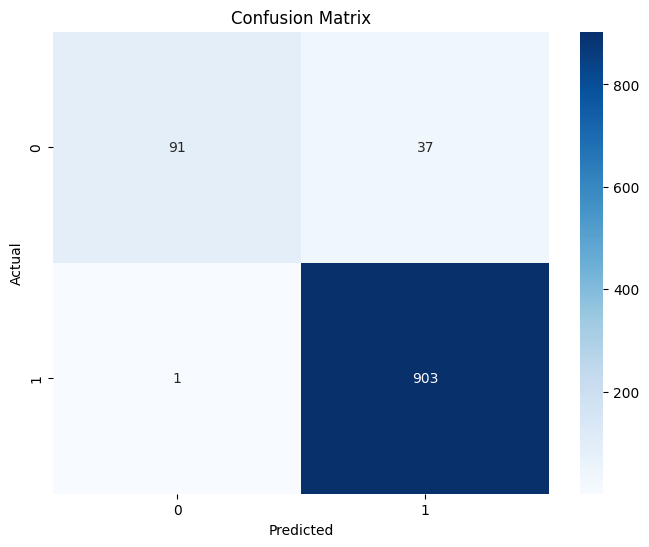

In [39]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

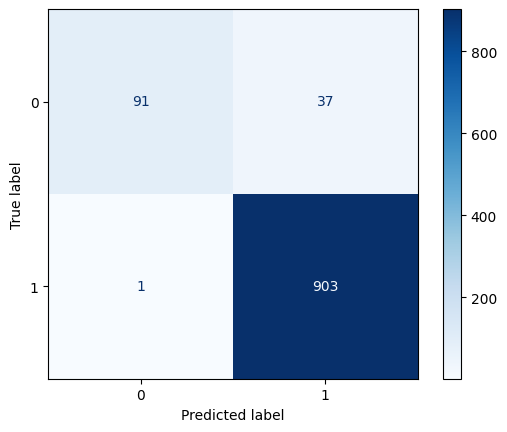

In [40]:
# plot confusion matrix using scikit-learn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

In [42]:
rf_Recall = recall_score(Y_test, prediction_on_test_data)
rf_Precision = precision_score(Y_test, prediction_on_test_data)
rf_f1 = f1_score(Y_test, prediction_on_test_data)
rf_accuracy = accuracy_score(Y_test, prediction_on_test_data)

In [43]:
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Logistic Regression model', 'output')
rf_score

,Logistic Regression model,Recall,Precision,F1 Score,Accuracy
0,output,0.998894,0.960638,0.979393,0.963178


In [45]:
print(classification_report(Y_test,prediction_on_test_data))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       128
           1       0.96      1.00      0.98       904

    accuracy                           0.96      1032
   macro avg       0.97      0.85      0.90      1032
weighted avg       0.96      0.96      0.96      1032



# 9- Building a Predictive System

In [46]:
input_mail = ['''I've been searching for the right words to thank you for this breather. 
                I promise i wont take your help for granted and will fulfil my promise. 
                You have been wonderful and a blessing at all times''']

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [47]:
prediction

array([1])